<a href="https://colab.research.google.com/github/22f2001443/ideas_internship_notebook/blob/main/notebook_3_globalTemp/Visualizing_Time_Series_Dataset_Global_Temp_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

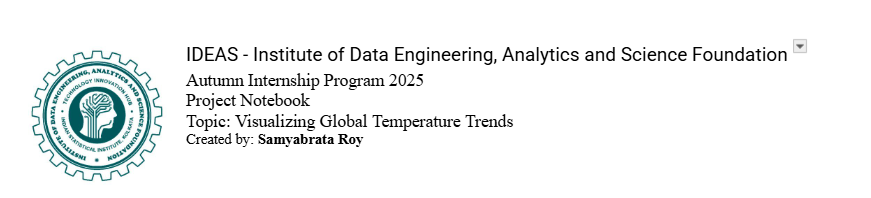

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Notebook: 3

👋 Welcome students!

In this journey, we’re going to take a dataset and slowly uncover the story it tells through visualization. Numbers by themselves can feel cold and endless, but once we turn them into visuals, they begin to speak.


---




---

## 📝 Before We Dive In...

Before we start digging deep into the dataset, let’s pause for a moment and reflect.  
Here are a couple of questions for you to think about (and maybe discuss!):

1. **What do you understand by *Time-Series Data*?**  
Time-series data just means data that is recorded sequentially over time at regular or irregular intervals. For example, instead of just random numbers, each value is connected to a particular time (day, month, or year). Examples of time series data are daily sales, monthly temperature, or yearly rainfall, hourly electricity consumption..Basically, the order matters because it shows how things change with time.
2. **Do you think choosing Python as our programming language for this analysis is a good decision?**  
Ans: Yes, I think Python is a really good choice for this. It has lots of libraries like pandas, matplotlib, seaborn, and plotly that make it super easy to clean and plot time-series data. Also, Python is easier to learn compared to many other languages. It’s very popular in data science, so we’ll get a lot of support and tutorials if we’re stuck.
---

Introduction



## ⚙️ Setting Things Up

Before we begin our analysis, we need to make sure we have the right tools.  
In the next coding cell, we’ll install and import the required Python packages that will help us explore and visualize the COVID-19 dataset.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime

---

## 📂 Loading Our Dataset

Now that our setup is ready, it’s time to bring in the data we’ll be working with.  
In the next coding cell, we’ll load the COVID-19 dataset directly from **Google Drive** (shared with public view access).  

Once the file is loaded, we’ll **print the first few rows** so that we can get a quick look at what the dataset contains before moving into analysis and visualization.  



In [2]:
# Replace with your Google Drive file ID which has public view access
file_id = "1kRogzVjnT_2qcjLd0x8jHFmWsq1Ek9NB"

# Construct the download URL
url = f"https://drive.google.com/uc?export=download&id={file_id}"

try:
    # Read CSV directly into pandas
    df_temp = pd.read_csv(url)
    print(df_temp.head())
except Exception as e:
    print("Error loading data:", e)


    Source        Date    Mean
0     GCAG  2016-12-06  0.7895
1  GISTEMP  2016-12-06  0.8100
2     GCAG  2016-11-06  0.7504
3  GISTEMP  2016-11-06  0.9300
4     GCAG  2016-10-06  0.7292


* To get more info about metadata of the dataset refer to README file in the root of this notebook directory

##Task:

What if the dataset was not available in any only repo or not hosted anywhere? How can you upload a dataset from your local machine? Code it

Yes, we can still copy the data into excel, csv or google sheet. Then, we need to save the dataset in the same folder created for the code and add the folder in VS code workspace.

In [3]:
import pandas as pd
df_temp= pd.read_csv("monthly_csv.csv")
print(df_temp.head())

    Source        Date    Mean
0     GCAG  2016-12-06  0.7895
1  GISTEMP  2016-12-06  0.8100
2     GCAG  2016-11-06  0.7504
3  GISTEMP  2016-11-06  0.9300
4     GCAG  2016-10-06  0.7292




---


## EDA including visualization

### Plot 1:

Monthly Revenue Over Time  

Visualizing monthly avg temparature obtaining from 2 different sources, which will help helps us understand trends across the years.  
Are there peaks during certain months (like due to any particular season)? Let’s find out.

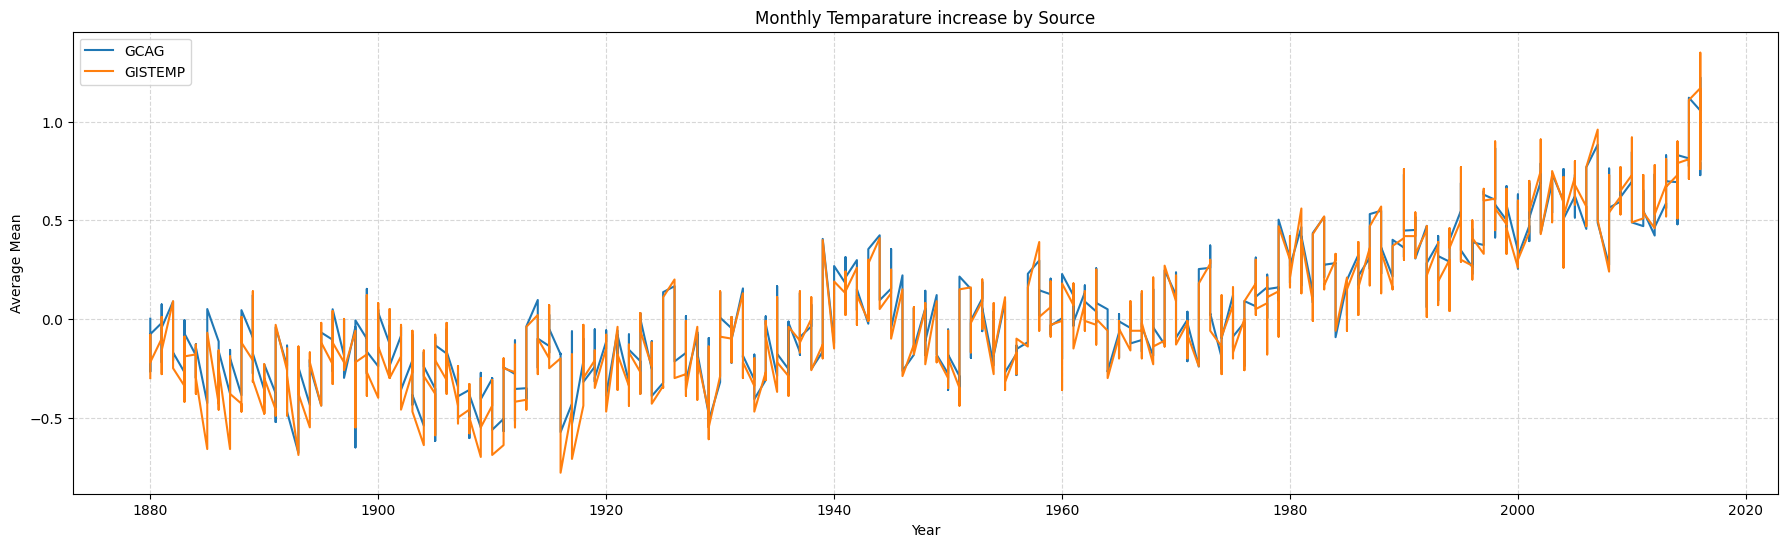

In [4]:
import matplotlib.pyplot as plt

# Convert Date column to datetime
df_temp['Date'] = pd.to_datetime(df_temp['Date'],  errors='coerce')
df_temp['Year'] = df_temp['Date'].dt.year

# Plot line chart
plt.figure(figsize=(22,6))
for source in df_temp['Source'].unique():
    subset = df_temp[df_temp['Source'] == source]
    plt.plot(subset['Year'], subset['Mean'], label=source)

plt.title("Monthly Temparature increase by Source")
plt.xlabel("Year")
plt.ylabel("Average Mean")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()




---



### Plot 2:

12 Months Moving Average

Smoothing out seasonal fluctuations and short-term variations to reveal the underlying long-term temperature trends. The 12-month moving average provides a clearer view of climate patterns by averaging each month with the 11 months surrounding it, making it easier to identify gradual warming or cooling trends over the years.

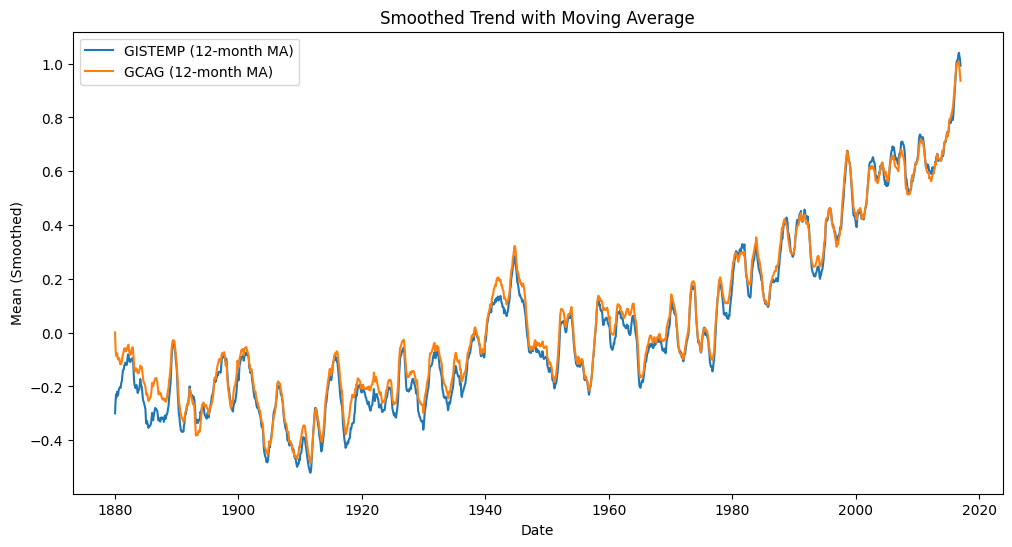

In [5]:
# Sort data by Date
df_temp = df_temp.sort_values(by="Date")

# Calculate moving average (e.g., 12-month window)
df_temp['Moving_Avg'] = df_temp.groupby('Source')['Mean'].transform(lambda x: x.rolling(window=12, min_periods=1).mean())

# Plot moving average
plt.figure(figsize=(12,6))
for source in df_temp['Source'].unique():
    subset = df_temp[df_temp['Source'] == source]
    plt.plot(subset['Date'], subset['Moving_Avg'], label=f"{source} (12-month MA)")

plt.title("Smoothed Trend with Moving Average")
plt.xlabel("Date")
plt.ylabel("Mean (Smoothed)")
plt.legend()
plt.show()


Q. How would you interpet this?

Ans: From the first plot, I can see that the monthly average temperature is going up over time for both sources. There are some ups and downs, but overall the line is rising, which means the earth is gradually warming. When we look at the 12-month moving average, the short-term noise like seasonal effects gets smoothed out and it clearly shows a long-term increasing trend. Therefore the interpretation is that even though temperature varies month to month, the overall direction is steadily upward.

---------------

### Construct another line plot by taking any one of the souces in count and try to smooth-out the variation more and try to come up with a trend
We can do this by applying a larger window size (for example, 60 months = 5 years) on just one of the sources. That will smooth it much more and highlight the trend.


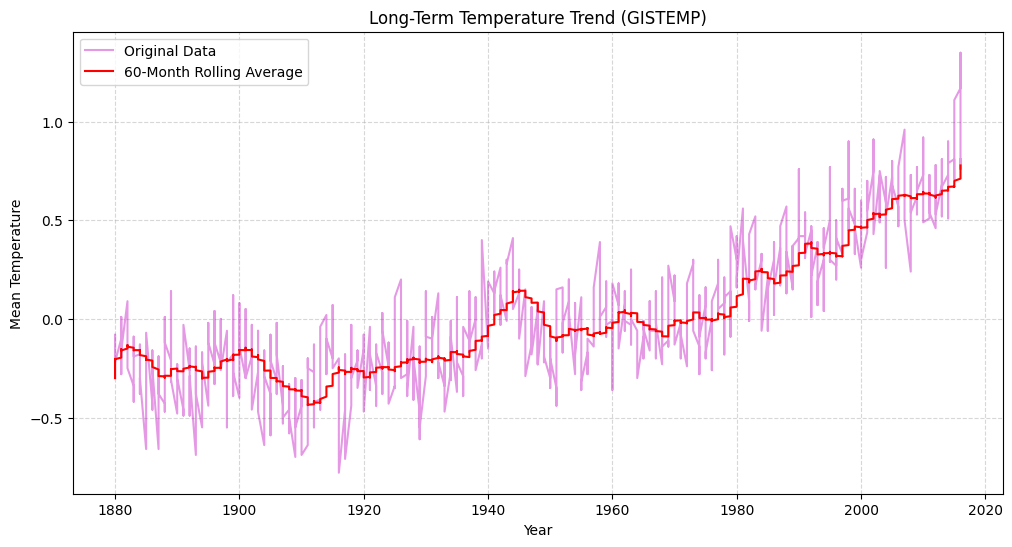

In [6]:
import matplotlib.pyplot as plt

# Picking 'GCAG'
source_name = df_temp['Source'].unique()[0]
df_source = df_temp[df_temp['Source'] == source_name].copy()
df_source['Rolling_60M'] = df_source['Mean'].rolling(window=60, min_periods=1).mean()

# Plot
plt.figure(figsize=(12,6))
plt.plot(df_source['Year'], df_source['Mean'], 'm', alpha=0.4, label="Original Data")
plt.plot(df_source['Year'], df_source['Rolling_60M'], color="red", label="60-Month Rolling Average")
plt.title(f"Long-Term Temperature Trend ({source_name})")
plt.xlabel("Year")
plt.ylabel("Mean Temperature")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


### Interpretation
The 60-month rolling average smooths the line a lot more compared to the 12-month moving average. This removes most of the seasonal and short-term noise and shows a very clear warming trend across the years. Even though there are ups and downs in the raw data, the smoothed line makes it obvious that temperatures are steadily rising over the long term. This indicates an obvious Global warming over the years.




---


### Plot 3

Seasonal Temperature Heatmap (Last 50 Years)

A comprehensive heatmap displaying temperature variations across months and years over the past five decades. This visualization reveals seasonal patterns, climate shifts, and anomalies by showing how temperatures have changed month-by-month across different years. Warmer periods appear as lighter/warmer colors while cooler periods show as darker/cooler colors, making it easy to spot seasonal consistency, unusual weather events, and long-term climate trends.

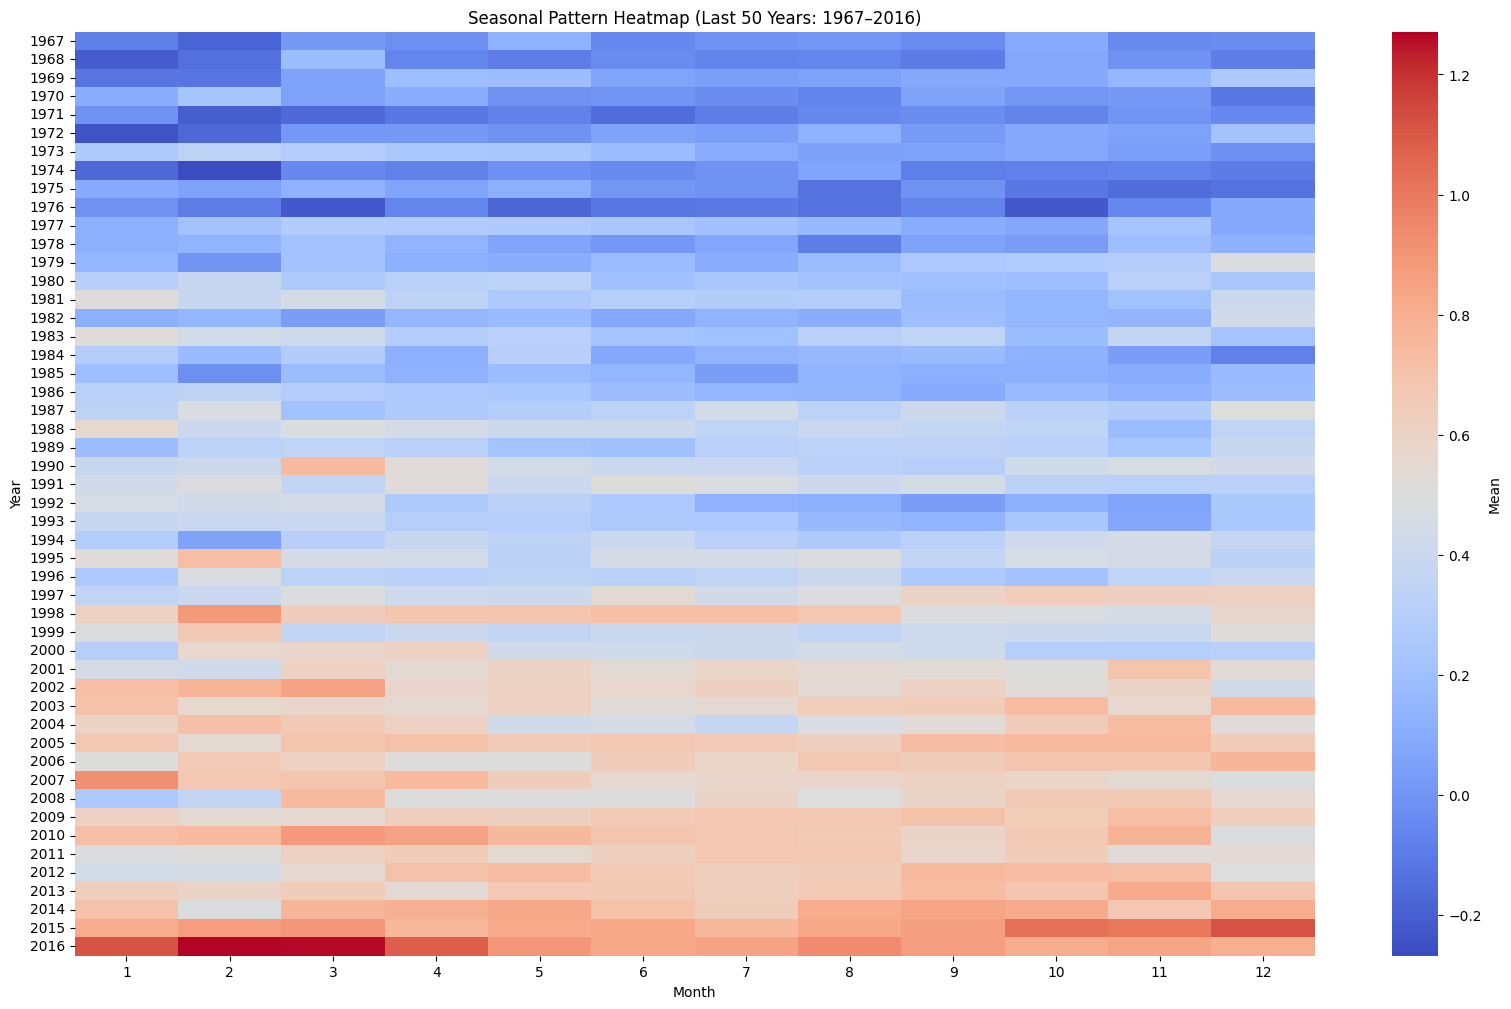

In [7]:
import seaborn as sns
# Extract Year and Month
df_temp['Year'] = df_temp['Date'].dt.year
df_temp['Month'] = df_temp['Date'].dt.month

# Filter last 50 years
latest_year = df_temp['Year'].max()
df_last50 = df_temp[df_temp['Year'] >= latest_year - 49]

# Group by Year and Month (average across sources if needed)
seasonal_data = df_last50.groupby(['Year','Month'])['Mean'].mean().reset_index()

# Pivot for heatmap
heatmap_data = seasonal_data.pivot(index='Year', columns='Month', values='Mean')

# Plot heatmap
plt.figure(figsize=(20,12))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=False, cbar_kws={'label': 'Mean'})
plt.title(f"Seasonal Pattern Heatmap (Last 50 Years: {latest_year-49}–{latest_year})")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


Q. How about we try to visualize last 20 years rather? Construct the plot

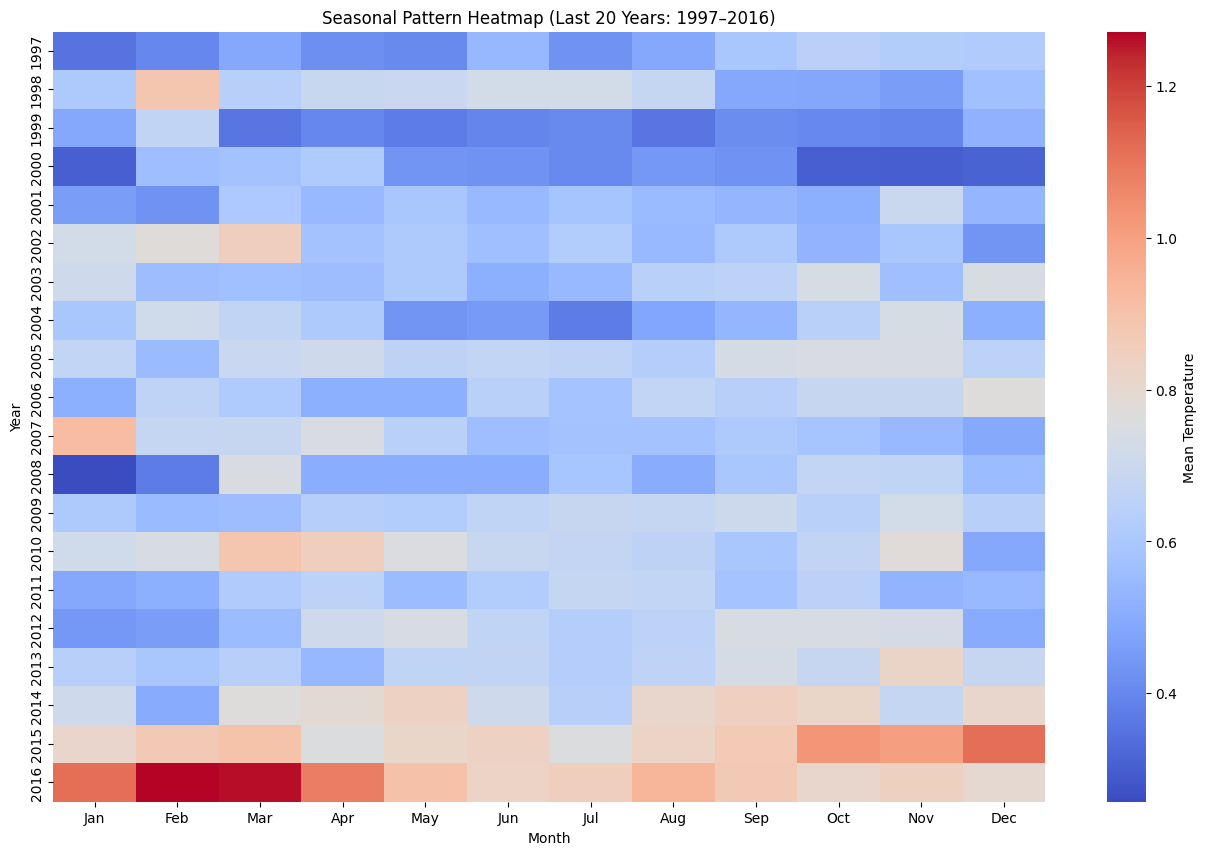

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

# Extracting Year and Month
df_temp['Year'] = df_temp['Date'].dt.year
df_temp['Month'] = df_temp['Date'].dt.month
# Filtering last 20 years
latest_year = df_temp['Year'].max()
df_last20 = df_temp[df_temp['Year'] >= latest_year - 19]
seasonal_data_20 = df_last20.groupby(['Year','Month'])['Mean'].mean().reset_index()
heatmap_data_20 = seasonal_data_20.pivot(index='Year', columns='Month', values='Mean')

# Replacing month numbers with names
heatmap_data_20.columns = [calendar.month_abbr[m] for m in heatmap_data_20.columns]

# Plot
plt.figure(figsize=(16,10))
sns.heatmap(heatmap_data_20, cmap="coolwarm", cbar_kws={'label': 'Mean Temperature'})
plt.title(f"Seasonal Pattern Heatmap (Last 20 Years: {latest_year-19}–{latest_year})")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()




---

Task:

What type of charts could have served the same purpose done in plot 3? Plot any one of them (apart from heatmap) and visualize seasonal variation

Ans: A very effective plot is the boxplots, where we plot months on the x-axis and temperature distribution (over the last 50 years) on the y-axis. This way, we can see both the central tendency and spread of temperatures for each month.

/tmp/ipython-input-1618273391.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_last50, x="Month_Name", y="Mean", palette="coolwarm")


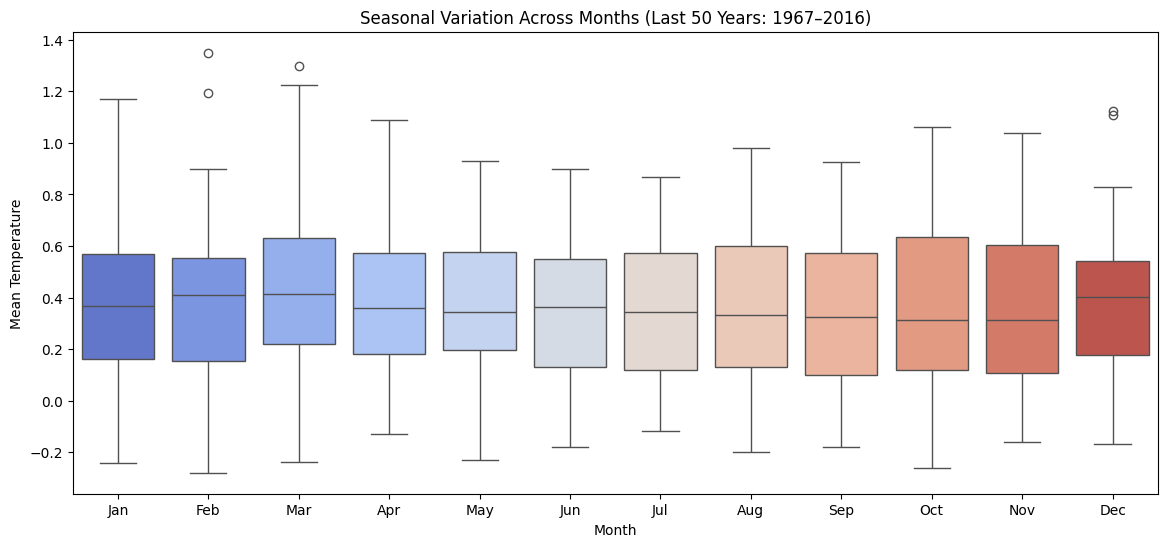

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

latest_year = df_temp['Year'].max()
df_last50 = df_temp[df_temp['Year'] >= latest_year - 49].copy()

# Add month names
df_last50['Month_Name'] = df_last50['Month'].apply(lambda x: calendar.month_abbr[x])

# Plot boxplot
plt.figure(figsize=(14,6))
sns.boxplot(data=df_last50, x="Month_Name", y="Mean", palette="coolwarm")
plt.title(f"Seasonal Variation Across Months (Last 50 Years: {latest_year-49}–{latest_year})")
plt.xlabel("Month")
plt.ylabel("Mean Temperature")
plt.show()



---



### Assignment:

Find a similar dataset from any public repository or construct a synthetic data from `www.syngendata.ai` and perform similar analysis to draw inference

I have chosen the Berkeley Earth dataset because it provides long-term, high-quality temperature anomaly records for different regions of the world, including Asia. By analyzing this dataset, we can assess long-term warming trends, detect acceleration in recent decades and study seasonal as well as extreme temperature variations in our continent, Asia.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.style.use("seaborn-v0_8-whitegrid")

Loading and Cleaning the data

In [11]:
path = "berkeley-earth-temperature.txt.csv"
rows = []
with open(path, "r", encoding="utf-8", errors="replace") as f:
    for line in f:
        parts = line.strip().split(",")
        if len(parts) >= 12 and parts[0].isdigit():  # data rows start with year
            rows.append(parts[:12])

cols = [
    "year","month","monthly_anom","monthly_unc",
    "annual_anom","annual_unc",
    "fiveyr_anom","fiveyr_unc",
    "tenyr_anom","tenyr_unc",
    "twentyyr_anom","twentyyr_unc"
]
df = pd.DataFrame(rows, columns=cols).apply(pd.to_numeric, errors='coerce')

# Adding datetime index
df["date"] = pd.to_datetime(dict(year=df["year"], month=df["month"], day=1))
df = df.set_index("date")

#monthly anomaly column
series = df["monthly_anom"].astype(float)
print("Data covers", series.index.min(), "→", series.index.max(), "with", len(series), "months")


Data covers 1839-08-01 00:00:00 → 2020-12-01 00:00:00 with 2177 months


----
1) How do monthly anomalies evolve over time and what is the long-term trend?

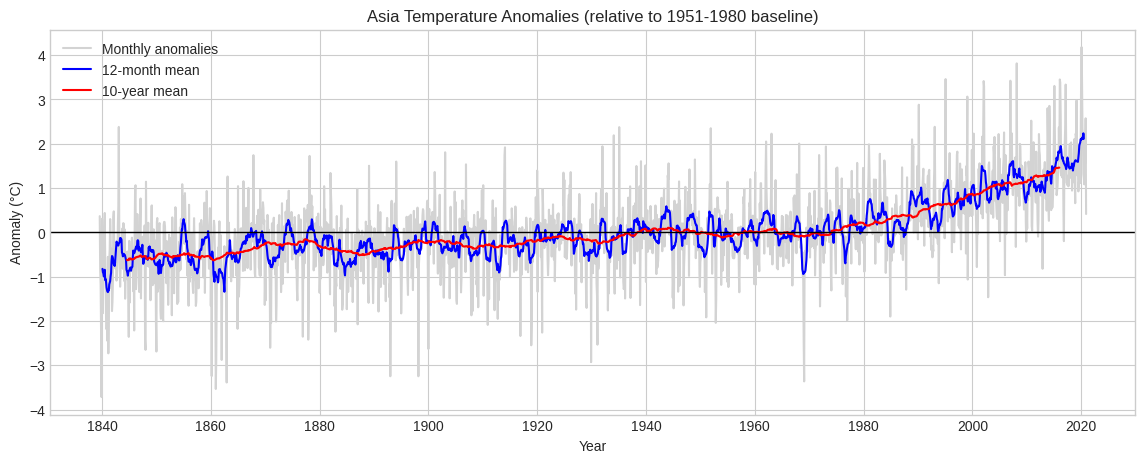

In [12]:
plt.figure(figsize=(14,5))
plt.plot(series.index, series, color="lightgray", label="Monthly anomalies")
plt.plot(series.rolling(12, center=True).mean(), color="blue", label="12-month mean")
plt.plot(series.rolling(120, center=True).mean(), color="red", label="10-year mean")
plt.axhline(0, color="black", lw=1)
plt.title("Asia Temperature Anomalies (relative to 1951-1980 baseline)")
plt.ylabel("Anomaly (°C)")
plt.xlabel("Year")
plt.legend()
plt.show()

Answer= The monthly anomaly series is highly variable with strong season-to-season fluctuations. The 12-month mean smooths out noise and the 10-year mean reveals the long-term warming trend. After ~1980, anomalies are consistently positive relative to the 1951–1980 baseline, showing clear sustained warming.


----

2. What is the long-term warming rate for Asia?

/tmp/ipython-input-3215129871.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual = series.resample("A").mean()


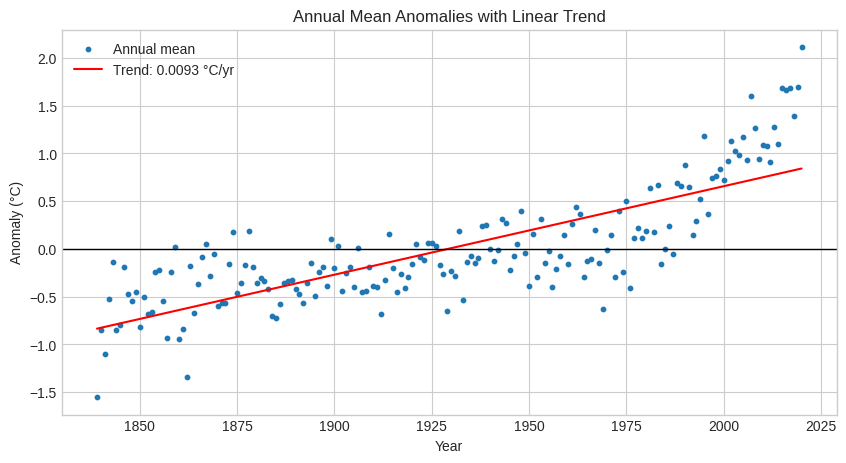

Slope per decade: 0.0925727758640538
p-value: 4.05001949179546e-41


In [13]:
annual = series.resample("A").mean()
annual.index = annual.index.year
slope, intercept, r, p, stderr = stats.linregress(annual.index, annual.values)
#plotting
plt.figure(figsize=(10,5))
plt.scatter(annual.index, annual, s=10, label="Annual mean")
plt.plot(annual.index, intercept + slope*annual.index, "r", label=f"Trend: {slope:.4f} °C/yr")
plt.axhline(0, color="black", lw=1)
plt.title("Annual Mean Anomalies with Linear Trend")
plt.xlabel("Year")
plt.ylabel("Anomaly (°C)")
plt.legend()
plt.show()
print("Slope per decade:", slope*10)
print("p-value:", p)

Answer= The linear regression on annual means gives a positive slope. For the full record (1839–2020), the warming rate is 0.0926°C per decade. The small p-value indicates this trend is robust, i.e. the observed warming is not due to chance.

------
3. Which decades were warmest and which decades warmed fastest?

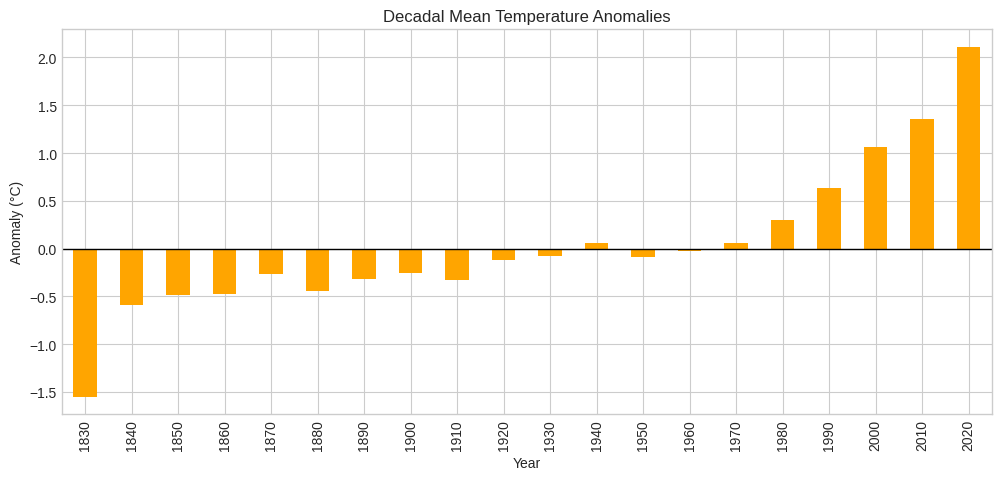

decade_start
1930   -0.081875
1940    0.056058
1950   -0.091508
1960   -0.020567
1970    0.054817
1980    0.303775
1990    0.636308
2000    1.068450
2010    1.355225
2020    2.111417
Name: annual_anom, dtype: float64


In [14]:
annual_df = annual.dropna().to_frame("annual_anom")
annual_df["decade_start"] = (annual_df.index // 10) * 10
decadal_means = annual_df.groupby("decade_start")["annual_anom"].mean()

plt.figure(figsize=(12,5))
decadal_means.plot(kind="bar", color="orange")
plt.axhline(0, color="black", lw=1)
plt.title("Decadal Mean Temperature Anomalies")
plt.ylabel("Anomaly (°C)")
plt.xlabel("Year")
plt.show()
print(decadal_means.tail(10))

Answer: Decadal means show that early 20th century decades fluctuate around or below the baseline. From the 1980s onwards, every decade is warmer than the previous one. The 2000s and 2010s are the warmest decades on record, confirming that warming has accelerated in recent decades.

----
4. When do strong anomalies occur?

Ans: From the analysis below, we can see that the heatmap shows a gradual transition from mostly blue (cool) anomalies before ~1950 to deep red anomalies after ~2000. All months are affected implying that warming is not limited to a single season but occurs throughout the year.

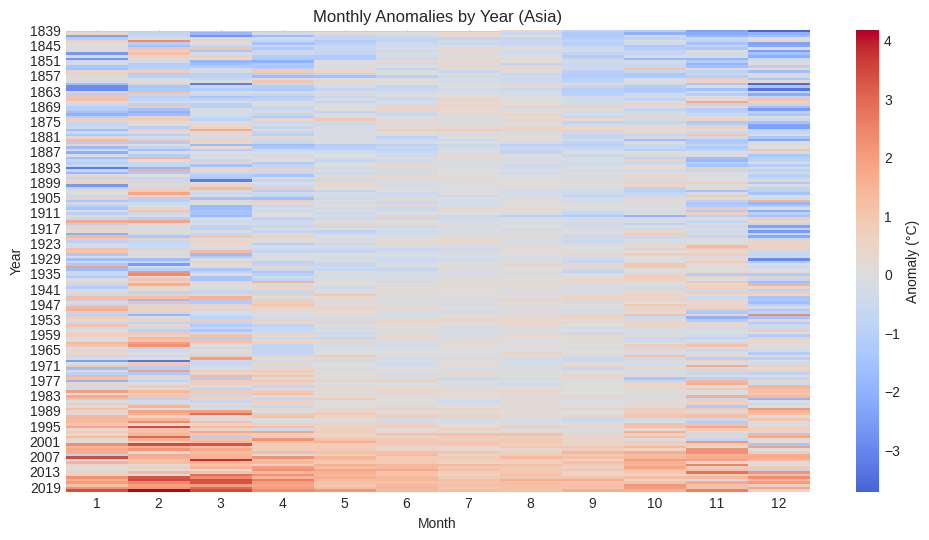

In [15]:
pivot = df.pivot_table(values="monthly_anom", index="year", columns="month")
plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="coolwarm", center=0, cbar_kws={'label': "Anomaly (°C)"})
plt.title("Monthly Anomalies by Year (Asia)")
plt.ylabel("Year")
plt.xlabel("Month")
plt.show()

------
5. Has the amplitude of the seasonal cycle changed? (30 year rolling window)

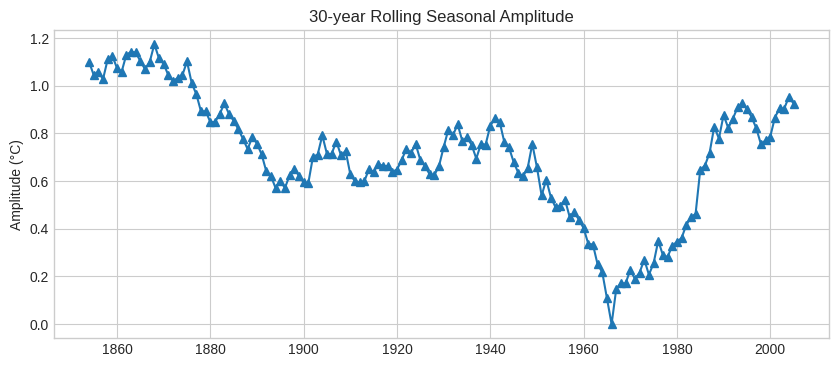

Seasonal amplitude trend per decade: -0.03171754463735468 p = 3.4124573567185e-13


In [16]:
years = np.arange(series.index.year.min(), series.index.year.max() - 29)
amps, centers = [], []

for y in years:
    win = series[(series.index.year >= y) & (series.index.year <= y+29)].dropna()
    if len(win) < 12*10:
        continue
    climat = win.groupby(win.index.month).mean()
    amps.append(climat.max() - climat.min())
    centers.append(y+15)

amp_df = pd.DataFrame({"center_year": centers, "seasonal_amplitude": amps})

plt.figure(figsize=(10,4))
plt.plot(amp_df["center_year"], amp_df["seasonal_amplitude"], marker="^")
plt.title("30-year Rolling Seasonal Amplitude")
plt.ylabel("Amplitude (°C)")
plt.show()

slope_amp, _, _, p_amp, _ = stats.linregress(amp_df["center_year"], amp_df["seasonal_amplitude"])
print("Seasonal amplitude trend per decade:", slope_amp*10, "p =", p_amp)


Ans: The amplitude of the seasonal cycle i.e. difference between warmest and coldest months shows a slight decreasing trend about −0.032 °C per decade. This suggests that winters are warming slightly faster than summers which leads to a reduced seasonal contrast.

-----
6. How many extreme warm months occur per decade?

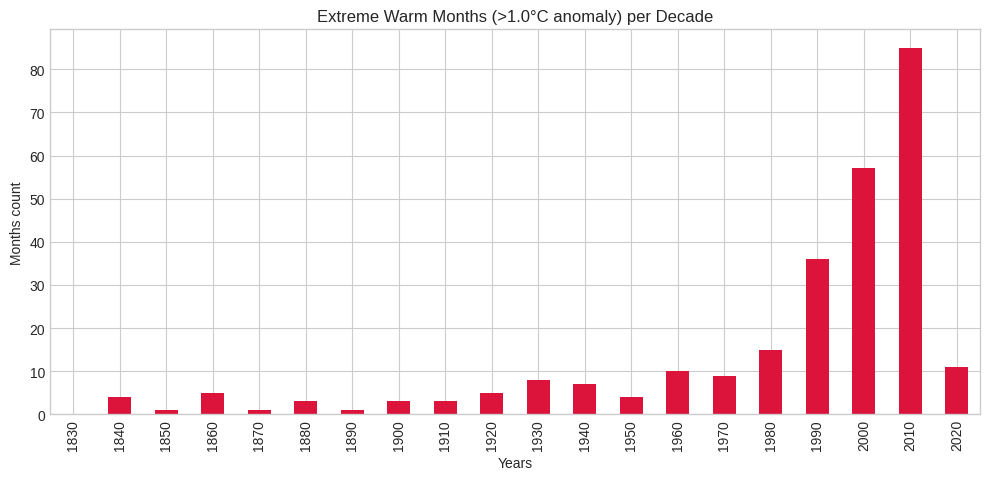

decade_start
1930     8
1940     7
1950     4
1960    10
1970     9
1980    15
1990    36
2000    57
2010    85
2020    11
Name: count, dtype: int64


In [17]:
extreme = (series > 1.0).astype(int)
extreme_df = extreme.groupby(extreme.index.year).sum().to_frame("count")
extreme_df["decade_start"] = (extreme_df.index // 10) * 10
extreme_by_decade = extreme_df.groupby("decade_start")["count"].sum()

plt.figure(figsize=(12,5))
extreme_by_decade.plot(kind="bar", color="crimson")
plt.title("Extreme Warm Months (>1.0°C anomaly) per Decade")
plt.ylabel("Months count")
plt.xlabel("Years")
plt.show()
print(extreme_by_decade.tail(10))

Ans: Extreme warm months were rare before 1980. Their frequency rises dramatically in recent decades tending to 36 in the 1990s, 57 in the 2000s and 85 in the 2010s. This sharp rise confirms that strong positive anomalies are now much more common.

-----
Final: Is recent warming faster than past warming?

In [18]:
def slope_period(series, start, end):
    annual = series.resample("A").mean()
    annual.index = annual.index.year
    mask = (annual.index >= start) & (annual.index <= end)
    y = annual.index[mask]
    x = annual[mask].values
    slope, _, _, p, _ = stats.linregress(y, x)
    return slope*10, p
periods = [(1839,2020),(1901,1950),(1951,1980),(1971,2000),(1991,2020)]
for st, ed in periods:
    slope_dec, pval = slope_period(series, st, ed)
    print(f"{st}-{ed}: {slope_dec:.3f} °C/decade (p={pval:.2e})")

1839-2020: 0.093 °C/decade (p=4.05e-41)
1901-1950: 0.077 °C/decade (p=9.38e-04)
1951-1980: 0.039 °C/decade (p=5.15e-01)
1971-2000: 0.279 °C/decade (p=1.65e-04)
1991-2020: 0.434 °C/decade (p=5.65e-09)


/tmp/ipython-input-3860023948.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual = series.resample("A").mean()


ANSWER:
The comparison proves that the warming rate has increased dramatically in the last 30 years i.e. warming has accelerated. The data makes it clear that Asia has been warming faster in recent decades with extreme hot months becoming more common. It is a reminder of the real and growing impact of climate change on our lives.